# MATH2319 - Machine Learning 
# Placement Prediction Phase 2
## Project Group 74
#### Subbiah Soundarapandian(S3825012), Sudershan Ravi(S3829895)

## Table of Contents
1. [Introduction](#introduction)<br>
    1.1. [Report Overview](#RO)<br>
    1.2. [Overview of Methodology](#mo)<br>
2. [Predictive Modelling](#pm)<br>
    2.1.[Feature Selection](#fs)<br>
    2.2.[Model Fitting and Tuning](#mf)<br>
    2.3.[Model Comparison](#mc)<br>
3. [Critique & Limitation](#cl)<br>
4. [Summary & Conclusions](#sc)<br>
    4.1.[Project Summary](#ps)<br>
    4.2.[Summary of Findings](#sof)<br>
    4.3.[Conclusions](#con)<br>
5. [References](#ref)

## Introduction <a name="introduction"></a>

### Report Overview: <a name="RO"></a>

The [Campus placement prediction](https://www.kaggle.com/benroshan/factors-affecting-campus-placement)<sup>[1]</sup> dataset is prepared and fitted with four disparate models and predicted.<br>
The results of the models are then compared to determine the optimal model.

### Overview of Methodology: <a name="OoM"></a>

The dataset, <b>'Placement_Data_Full_Class.csv'</b> is utilized for this project. It comprises 215 observations of 13 features which describe the various attributes of each student appearing for the placement interviews.<br>

The above-mentioned dataset is prepared for model fitting by performing the following methods:

* One-Hot Encoding the categorical features.
* Splitting the descriptive features and the target feature.
* Min-Max Scaling the descriptive features to be between 0 and 1.

Feature Selection is then performed on the descriptive features to determine the most influencing features.<br>
The dataset is split into train and test data to fit the model and evaluate with, respectively. <br>
The train data is subsequently fit with all the 4 nominated models and evaluated for performance.<br>
To avoid the occurrence of a "lucky good fit" which might influence the model performance metrics, K-Fold Validation is performed.<br>
Following which, Hyperparameter Tuning is performed to choose the set of optimal hyperparameters for the algorithm along with calculating the mean test score to plot the receiver operating characteristic (ROC) curve to examine the diagnostic ability of the classifier in question.<br>
Finally, a confusion matrix is plotted with the prediction values. <br> 



In [1]:
#IMPORTING THE LIBRARIES

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import metrics

#### Setting Global Random Seed

Global random seed is set to ensure the same state randomization is utilized throughout the entire project. 

In [2]:
# SETTING A GLOBAL RANDOM SEED VALUE

# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

Reading the cleaned dataset obtained from the phase 1 analysis of this project.

In [3]:
assignds = pd.read_csv("Phase1_CleanedData.csv")

In [4]:
assignds.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [5]:
assignds.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
5,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed
6,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
7,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed
8,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed
9,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed


In [6]:
assignds.shape

(214, 13)

#### Encoding the Categorical Variables

Below step shows the one hot encoding of categorical variables.

In [7]:
# One Hot Encoding the categorical columns with integer values

for col in assignds.select_dtypes(include='object').columns:
    n = len(assignds[col].unique())
    if (n == 2):
        assignds[col] = pd.get_dummies(assignds[col], drop_first=True)
        
assignds = pd.get_dummies(assignds)

In [8]:
assignds.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.00,1,58.80,1,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.50,0,66.28,1,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.00,0,57.80,1,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.00,1,59.43,0,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.80,0,55.50,1,0,1,0,1,0,0
5,1,55.00,1,49.80,1,67.25,1,55.00,0,51.58,0,0,0,1,0,0,1
6,0,46.00,1,49.20,1,79.00,0,74.28,0,53.29,0,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.00,0,62.14,1,0,0,1,0,0,1
8,1,73.00,0,79.00,0,72.00,0,91.34,0,61.29,1,0,1,0,1,0,0
9,1,58.00,0,70.00,0,61.00,0,54.00,0,52.21,0,0,1,0,1,0,0


In [9]:
# Splitting the descriptive features and Target Variable

Data = assignds.drop(['status'],axis= 1)
Target = assignds['status']
Data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,1,91.00,1,58.00,0,55.00,1,58.80,0,1,0,0,0,1
1,1,79.33,0,78.33,1,77.48,1,86.50,0,66.28,0,0,1,0,0,1
2,1,65.00,0,68.00,0,64.00,0,75.00,0,57.80,1,0,0,1,0,0
3,1,56.00,0,52.00,0,52.00,0,66.00,1,59.43,0,0,1,0,0,1
4,1,85.80,0,73.60,0,73.30,0,96.80,0,55.50,0,1,0,1,0,0
5,1,55.00,1,49.80,1,67.25,1,55.00,0,51.58,0,0,1,0,0,1
6,0,46.00,1,49.20,1,79.00,0,74.28,0,53.29,0,1,0,1,0,0
7,1,82.00,0,64.00,0,66.00,1,67.00,0,62.14,0,0,1,0,0,1
8,1,73.00,0,79.00,0,72.00,0,91.34,0,61.29,0,1,0,1,0,0
9,1,58.00,0,70.00,0,61.00,0,54.00,0,52.21,0,1,0,1,0,0


Let us have a look at the number of positive and negative responses in the target variable.

In [10]:
# Checking the value counts of target variable

Target.value_counts()

1    147
0     67
Name: status, dtype: int64

#### Scaling of variables

To avoid any discrepancies in the data, we perform MinMax Scaling to make sure all the variables that are sent to data are in the same range of 0 to 1.

In [11]:
# Scaling the descriptive features

from sklearn import preprocessing

Data_Scaled = preprocessing.MinMaxScaler().fit_transform(Data)
Data_Scaled = pd.DataFrame(Data_Scaled)
Data_Scaled.columns = Data.columns
Data_Scaled.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech
0,1.0,0.538240,1.0,0.889621,1.0,0.195122,0.0,0.104167,1.0,0.284483,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.792414,0.0,0.680890,1.0,0.670244,1.0,0.760417,0.0,0.564843,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.497011,0.0,0.510708,0.0,0.341463,0.0,0.520833,0.0,0.247001,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.311482,0.0,0.247117,0.0,0.048780,0.0,0.333333,1.0,0.308096,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.925788,0.0,0.602965,0.0,0.568293,0.0,0.975000,0.0,0.160795,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.290868,1.0,0.210873,1.0,0.420732,1.0,0.104167,0.0,0.013868,0.0,0.0,1.0,0.0,0.0,1.0
6,0.0,0.105339,1.0,0.200988,1.0,0.707317,0.0,0.505833,0.0,0.077961,0.0,1.0,0.0,1.0,0.0,0.0
7,1.0,0.847454,0.0,0.444811,0.0,0.390244,1.0,0.354167,0.0,0.409670,0.0,0.0,1.0,0.0,0.0,1.0
8,1.0,0.661925,0.0,0.691928,0.0,0.536585,0.0,0.861250,0.0,0.377811,0.0,1.0,0.0,1.0,0.0,0.0
9,1.0,0.352711,0.0,0.543657,0.0,0.268293,0.0,0.083333,0.0,0.037481,0.0,1.0,0.0,1.0,0.0,0.0


### Feature Selection (FS): <a name="fs"></a>

Feature Selection is an often neglected method, but one which could improve the performance of a model algorithm significantly. There are various methods of feature selection and for the sake of this project, the F-Score method is selected as it is a statistical filter method.<br>
The feature selection function is imported and the 9 most influential descriptive features in the dataset are determined. To achieve this, an index is created with the features and their respective F-Scores, sorted from the highest to lowest. To provide more perspective clarity, the F-Scores of the features are plotted against the importance.<br>
Hence, the dataset is then sliced with the above mentioned features, to proceed with. 

In [12]:
# FEATURE SELECTION

from sklearn import feature_selection as fs

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=9)
fs_fit_fscore.fit_transform(Data_Scaled, Target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:9]
fs_indices_fscore

array([ 1,  3,  5,  6,  8,  7, 14,  0,  9], dtype=int64)

In [13]:
# BEST FEATURES BASED ON F-SCORE

best_features_fscore = Data_Scaled.columns[fs_indices_fscore].values
best_features_fscore

array(['ssc_p', 'hsc_p', 'degree_p', 'workex', 'specialisation',
       'etest_p', 'degree_t_Others', 'gender', 'mba_p'], dtype=object)

The above cell shows the top 9 features that are selected based on their F-Scores to proceed with model fitting.

In [14]:
# F-SCORES OF TOP 9 IMPORTANT FEATURES

feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([123.96100895,  68.00588081,  62.84242661,  17.10323624,
        13.962742  ,   3.44384456,   2.92400914,   1.67554083,
         1.41979219])

In [15]:
# Plotting the features with its F-Score

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

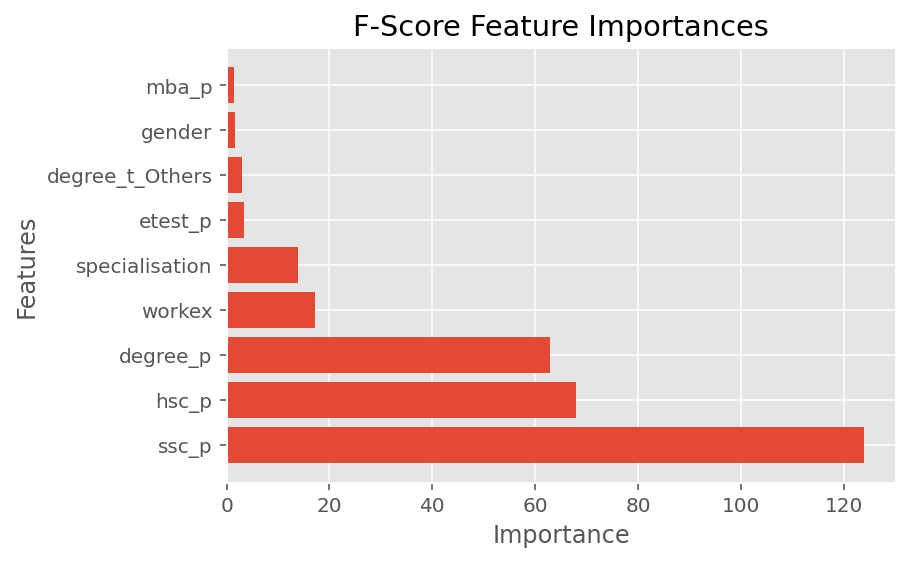

In [16]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')

Selecting the best features to proceed with model fitting.

In [17]:
Data_Scaled = Data_Scaled.iloc[:,fs_indices_fscore]
Data_Scaled.head(10)

,ssc_p,hsc_p,degree_p,workex,specialisation,etest_p,degree_t_Others,gender,mba_p
0,0.538240,0.889621,0.195122,0.0,1.0,0.104167,0.0,1.0,0.284483
1,0.792414,0.680890,0.670244,1.0,0.0,0.760417,0.0,1.0,0.564843
2,0.497011,0.510708,0.341463,0.0,0.0,0.520833,0.0,1.0,0.247001
3,0.311482,0.247117,0.048780,0.0,1.0,0.333333,0.0,1.0,0.308096
4,0.925788,0.602965,0.568293,0.0,0.0,0.975000,0.0,1.0,0.160795
5,0.290868,0.210873,0.420732,1.0,0.0,0.104167,0.0,1.0,0.013868
6,0.105339,0.200988,0.707317,0.0,0.0,0.505833,0.0,0.0,0.077961
7,0.847454,0.444811,0.390244,1.0,0.0,0.354167,0.0,1.0,0.409670
8,0.661925,0.691928,0.536585,0.0,0.0,0.861250,0.0,1.0,0.377811
9,0.352711,0.543657,0.268293,0.0,0.0,0.083333,0.0,1.0,0.037481


### Model Fitting & Tuning: <a name="mf"></a>

So far, the data has been prepared, scaled, encoded and the optimal features has been selected. The next step in the project is to fit the models and tune the hyperparamters to improve the model performances. But before that, the data requires to be split into training and testing data.<br>
Hence the data is split into 80-20 split, of train and test data, respectively.

In [18]:
# DATA MODELLLING
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
D_train, D_test, t_train, t_test = train_test_split(Data_Scaled, Target, test_size = 0.2, stratify=Target, shuffle=True, random_state=6)

print("Shape of D_train: ", D_train.shape)
print("Shape of D_test: ", D_test.shape)
print("Shape of t_train: ", t_train.shape)
print("Shape of t_test: ", t_test.shape)


Shape of D_train:  (171, 9)
Shape of D_test:  (43, 9)
Shape of t_train:  (171,)
Shape of t_test:  (43,)


To begin with model fitting, the dataset is fit with the K-Nearest Neighbor (K-NN) Classifier algorithm.<br> 

#### K-NN Classifier

The data is fit into the k-nn classifier and the score of the model is predicted the functions from sklearn library.

In [19]:
# K-NN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(D_train, t_train)
knn_classifier.score(D_test, t_test)

0.7906976744186046

The resultant score provides an initial insight on the performance of the model, which is evidently good with a score of 0.79 or 79%. <br>
Though, the model performance has been proved to fairly good, the doubt of a "lucky good fit" needs to be cleared. Hence, K-Fold Validation is performed to validate the data with 5 stratified folds and repeating the process 3 times, for good measure.

In [20]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3)

The output data is then utilized in the hyperparameter tuning of the K-NN model.<br> 
To perform the tuning, a dictionary consisting of the K-NN parameters, is defined. The following parameters are added to the dictionary:
* Number of neighbors to use, ranging from 1 to 10
* The type of distance metric. i.e; 1 (Manhattan), 2 (Euclidean) and 5 (Minkowski).
* The type of weight function used in the prediction. i.e; uniform or distance.
* The type of algorithm used to compute among auto, ball tree, kd-tree and brute. 

In [21]:
import numpy as np
parameters_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'p': [1, 2, 5],
              'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']
             }

Grid Search method is then employed to determine the optimal set of hyperparameters, as it is the most common and simple approach.<br>
The model algorithm with the set of optimal parameters resulting from the grid search method is then fit with the train data.

In [22]:
from sklearn.model_selection import GridSearchCV

GridSearch_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=parameters_KNN, 
                      cv=cv_method,
                      verbose=1,
                      scoring='accuracy', 
                      return_train_score=True)

In [23]:
GridSearch_KNN.fit(D_train, t_train)

Fitting 15 folds for each of 960 candidates, totalling 14400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 14400 out of 14400 | elapsed:  4.8min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 5], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=1)

Further, the run details for each fold during the cross-validation can be derived by computing the cross-validation results. 

In [24]:
Mean_Scores_CV_KNN = GridSearch_KNN.cv_results_['mean_test_score']
Mean_Scores_CV_KNN

array([0.75411765, 0.75411765, 0.78722689, 0.78722689, 0.77159664,
       0.77159664, 0.73854342, 0.75411765, 0.77165266, 0.78722689,
       0.77154062, 0.77159664, 0.79507003, 0.79507003, 0.80868347,
       0.81058824, 0.81439776, 0.80857143, 0.78319328, 0.81630252,
       0.7637535 , 0.81445378, 0.78336134, 0.7929972 , 0.80459384,
       0.80067227, 0.78319328, 0.78901961, 0.76392157, 0.76577031,
       0.78694678, 0.81826331, 0.77731092, 0.79490196, 0.75983193,
       0.78515406, 0.79495798, 0.79109244, 0.78913165, 0.78913165,
       0.78123249, 0.78515406, 0.79882353, 0.81058824, 0.77154062,
       0.79305322, 0.7637535 , 0.79501401, 0.78722689, 0.79887955,
       0.76156863, 0.77338936, 0.77142857, 0.77142857, 0.79109244,
       0.80672269, 0.75394958, 0.78128852, 0.7422409 , 0.77540616,
       0.75411765, 0.75411765, 0.78722689, 0.78722689, 0.77159664,
       0.77159664, 0.73854342, 0.75411765, 0.77165266, 0.78722689,
       0.77154062, 0.77159664, 0.79507003, 0.79507003, 0.80868

The best parameter values are obtained from the grid search. These resultant parameter values are applied to the K_NN model during model fitting and prediction.

In [25]:
GridSearch_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

The above output provides the best parameters for the K-NN Model.<br>

The cross-validation results are listed in a data frame with the types of parameters as the variables for each instance. 

In [26]:
results_KNN = pd.DataFrame(GridSearch_KNN.cv_results_['params'])
results_KNN['test_score'] = GridSearch_KNN.cv_results_['mean_test_score']
results_KNN['metric']=results_KNN['p'].replace([1,2,5],["Manhattan","Euclidean","Minkowski"])
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score,metric
0,auto,1,1,1,uniform,0.754118,Manhattan
1,auto,1,1,1,distance,0.754118,Manhattan
2,auto,1,1,2,uniform,0.787227,Euclidean
3,auto,1,1,2,distance,0.787227,Euclidean
4,auto,1,1,5,uniform,0.771597,Minkowski
...,...,...,...,...,...,...,...
955,brute,5,10,1,distance,0.806723,Manhattan
956,brute,5,10,2,uniform,0.753950,Euclidean
957,brute,5,10,2,distance,0.781289,Euclidean
958,brute,5,10,5,uniform,0.742241,Minkowski


To visualize the performances of the distance metric, the mean cross-validation score is plotted against the number of neighbors. 

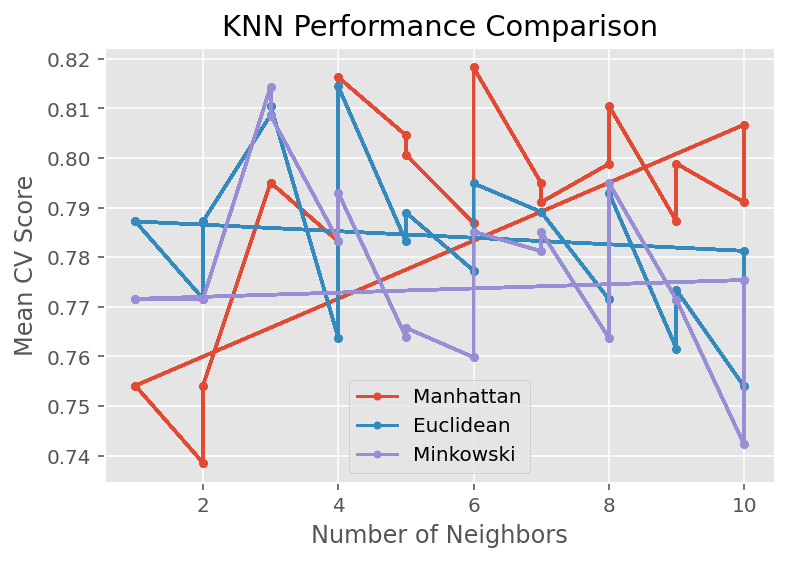

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

The model once fitted, is required to be evaluated. The Receiver Operating Characteristic (ROC) Curve is plotted to calculate the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) of the model. <br>
Before plotting the ROC curve, the prediction scores are calculated. The resultant output is expected to carry values ranging between 0 and 1. 

In [28]:
t_prob1 = GridSearch_KNN.predict_proba(D_test)
t_prob1[0:10]

array([[0.        , 1.        ],
       [0.1110703 , 0.8889297 ],
       [0.32856062, 0.67143938],
       [0.        , 1.        ],
       [0.60447038, 0.39552962],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.68301045, 0.31698955],
       [0.67525964, 0.32474036]])

Next, the True Positive Rate (TPR) and False Positive Rate (FPR) are calculated before calculating the Area Under the Curve (AUC) which provides the aggregate measure of performance in all classification thresholds.

In [29]:
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob1[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8153846153846154

The AUC is calculated to be 0.82 or 82% of the predictions are correct which implies that the model has performed really well.<br>
To get a better perspective the FPR and TPR values are listed in a data frame. 

In [30]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
df

,fpr,tpr
0,0.000000,0.000000
1,0.230769,0.600000
2,0.230769,0.800000
3,0.307692,0.800000
4,0.307692,0.933333
5,0.384615,0.933333
6,0.384615,0.966667
7,0.461538,0.966667
8,0.461538,1.000000
9,1.000000,1.000000


To visualize the ROC curve, the FPR and TPR values are plotted against each other and the corresponding values of random classifier is plotted as a diagonal line. 

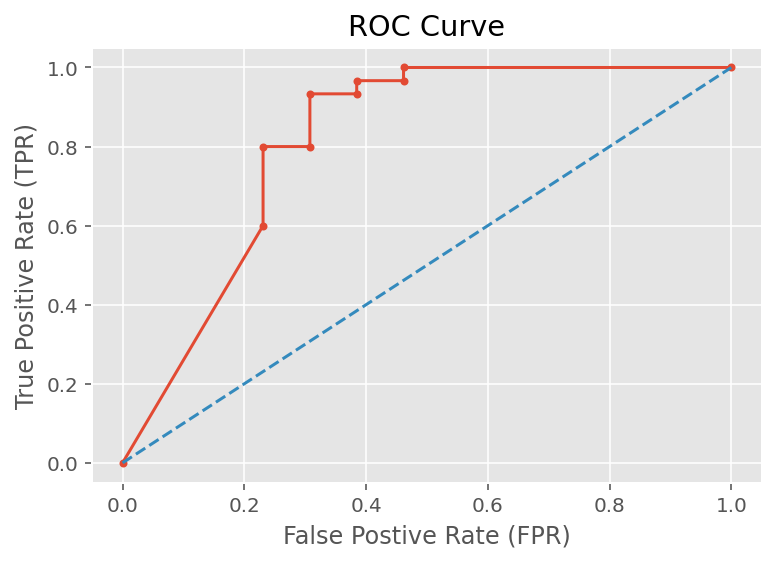

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='ROC Curve', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

As it can be seen from the ROC curve plot above, the curve has an irregular elbow over a range of FNR (0.2 to 0.5). While it may be an unideal curve the TPR could be seen increasing significantly through the curvature hence, proving the optimized K-NN model to highly performing in terms of prediction.<br>

And finally, to predict and determine the performance metrics of the K-NN Classifier model, the test data is utilized to produce prediction and a confusion matrix is plotted to display the results.

In [32]:
t_pred1 = GridSearch_KNN.predict(D_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(t_test, t_pred1))
cm.columns = ['y_pred_No', 'y_pred_Yes']
cm.index = ['y_test_No','y_test_Yes']
print(cm)

            y_pred_No  y_pred_Yes
y_test_No           8           5
y_test_Yes          1          29


As we can see from the above confusion matrix, the K-NN model has predicted 5 Falsely Positive Values while predicting just 1 Falsely Negative Value. It has correctly predicted the 8 true negatives and 29 true positives.

The model is then evaluated using classification report to obtain the performance metrics. 

In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(t_test,t_pred1))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



As we can see from the output above, it is evident from the metrics such as accuracy, 0.86 or 86%; that the positive class (placed) is predicted accurately as the recall score is 0.97 or 97%.Hence, the model has high predictive performance.<br>

The model fitting & fine tuning process for the other three models follows the same procedure. Hence, the performance analysis would be discussed in detail for the following models.<br>  


### Decision Tree Classifier

The next model to fit and evaluate is Decision Tree Classifier, DTC. To begin, the decision tree classifier algorithm is imported from the sklearn library.

To perform hyperparameter tuning, a dictionary consisting of the DTC parameters, is defined. The following parameters are added to the dictionary:
* The type of criteria to measure the quality of the split. i.e; gini, entropy.
* The maximum depth of the tree, ranging from 1 to 8. 
* The minimum number of samples required to split an internal node. i.e; 2,3.
* The maximum number of features to consider. i.e; sqrt, auto and log2.
* The minimum number of samples per leaf ranging from 1 to 11.<br>

A grid search is performed to the cross-validated data training data.


In [35]:
# DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

parameters_DTree = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3],
            'max_features': ['sqrt', 'auto', 'log2'],
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}

gs_DTree = GridSearchCV(estimator=DecisionTreeClassifier(), 
                     param_grid=parameters_DTree, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DTree.fit(D_train, t_train);

Fitting 15 folds for each of 1056 candidates, totalling 15840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 15840 out of 15840 | elapsed:  2.0min finished


In [36]:
gs_DTree.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3}

The set of optimal hyperparameters for the Decision Tree Classifier is as shown in the above output.

The mean scores are calculated as follows,

In [37]:
Mean_Scores_CV_DTree = gs_DTree.cv_results_['mean_test_score']
Mean_Scores_CV_DTree

array([0.76834734, 0.76823529, 0.76044818, ..., 0.80515406, 0.7562465 ,
       0.76414566])

The performance of types of criterion is compared and visualized. 

In [38]:
results_DT = pd.DataFrame(gs_DTree.cv_results_['params'])
results_DT['test_score'] = gs_DTree.cv_results_['mean_test_score']
results_DT.columns

Index(['criterion', 'max_depth', 'max_features', 'min_samples_leaf',
       'min_samples_split', 'test_score'],
      dtype='object')

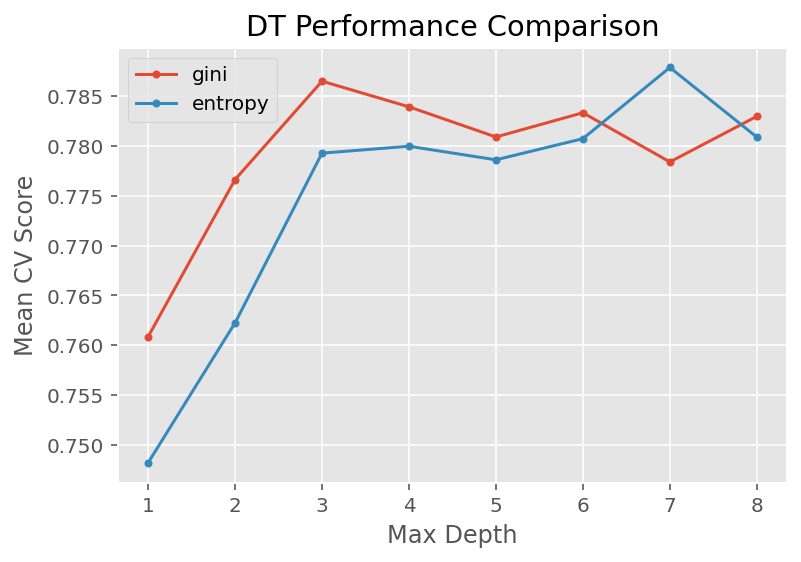

In [39]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

It is quiet evident from the above graph that best split criterion is entropy with a maximum depth of 8.

In [40]:
t_prob2 = gs_DTree.predict_proba(D_test)
t_prob2[0:10]

array([[0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.76923077, 0.23076923],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [41]:
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob2[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.7628205128205128

From the above output, it is safe to say that the model prediction are good, but not the best as the AUC score turns out to be 0.76 or 76% of the predictions are correct.

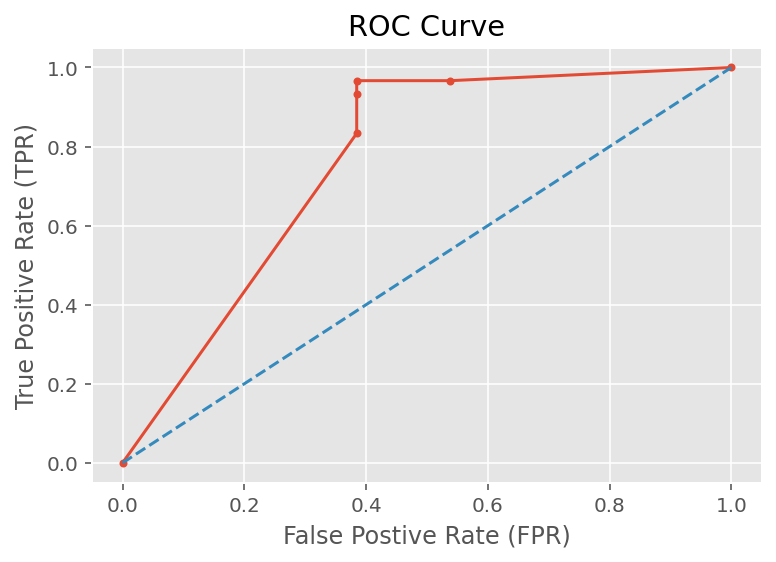

In [42]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
df

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='ROC Curve', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The above graph proves our assumptions to be true as the area under the curve is smaller than that of the K-NN model. 

In [43]:
t_pred2 = gs_DTree.predict(D_test)

In [44]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(t_test, t_pred2))
cm.columns = ['y_pred_No', 'y_pred_Yes']
cm.index = ['y_test_No','y_test_Yes']
print(cm)

            y_pred_No  y_pred_Yes
y_test_No           8           5
y_test_Yes          2          28


From the above confusion matrix, the DT model has predicted 5 FP values while predicting 2 FN values. 

In [45]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(t_test,t_pred2))

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43



As we can see from the output above,though the model accuracy is 0.84 or 84%; the positive class (placed) is predicted less accurately as the recall score is 0.79 or 79%.Hence, the model has high predictive performance but not higher than K-NN model.

### Naive Bayes Classifier

The next model to try is the Naive Bayes Classifier. To proceed with that, the GaussianNB and PowerTransformer functions are imported from sklearn library.

Furthermore, grid search is performed with the use of the dictionary created with the parameters of NB model. Further, power transformation is performed to center the distribution of values. 

In [46]:
# NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import PowerTransformer


parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=GaussianNB(), 
                     param_grid=parameters_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(D_train)
Data_transformed_test = PowerTransformer().fit_transform(D_test)

gs_NB.fit(Data_transformed, t_train);
# from sklearn.naive_bayes import GaussianNB

# nb_classifier = GaussianNB(var_smoothing=10**(-3))
# NB_Model = nb_classifier.fit(D_train, t_train)
# nb_classifier.score(D_test, t_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    5.6s finished


In [47]:
gs_NB.best_params_

{'var_smoothing': 0.43287612810830584}

The above output suggests that the best value of variance smoothing is 0.43.

In [48]:
Mean_Scores_CV_NB = gs_NB.cv_results_['mean_test_score']
Mean_Scores_CV_NB

array([0.82039216, 0.81456583, 0.81266106, 0.81848739, 0.82240896,
       0.82235294, 0.82235294, 0.82235294, 0.82235294, 0.82235294,
       0.82039216, 0.82039216, 0.82039216, 0.81652661, 0.81652661,
       0.81652661, 0.81848739, 0.81848739, 0.81848739, 0.81848739,
       0.81848739, 0.81848739, 0.81848739, 0.81848739, 0.81848739,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652661,
       0.81652661, 0.81652661, 0.81652661, 0.81652661, 0.81652

In [49]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

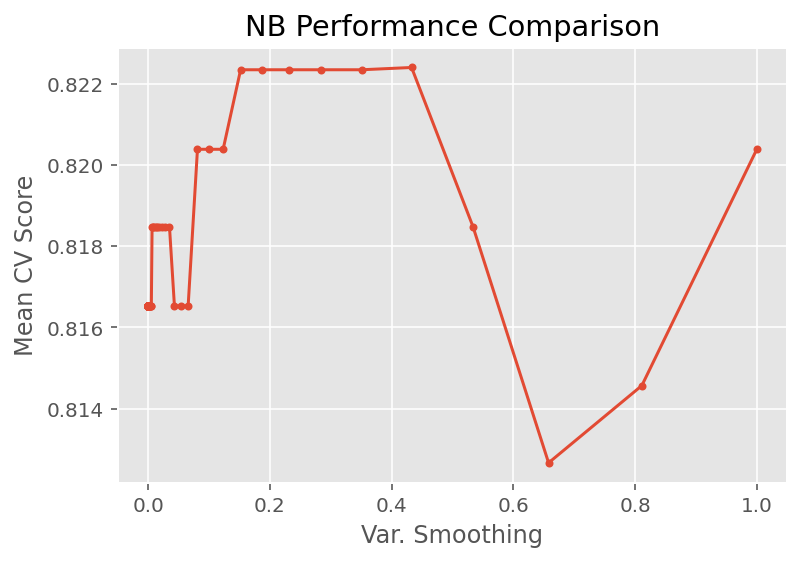

In [50]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

The output graph proves our prior assumption for the variance smoothing value to be true. 

In [51]:
t_prob3 = gs_NB.predict_proba(Data_transformed_test)
t_prob3[0:10]

array([[0.0491636 , 0.9508364 ],
       [0.63351086, 0.36648914],
       [0.12467717, 0.87532283],
       [0.00644402, 0.99355598],
       [0.86929528, 0.13070472],
       [0.18071006, 0.81928994],
       [0.00134168, 0.99865832],
       [0.01790974, 0.98209026],
       [0.97822955, 0.02177045],
       [0.96333392, 0.03666608]])

In [52]:
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob3[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8794871794871795

The AUC score is calculated to be 0.88 or 88% of the predictions made by the model is correct.


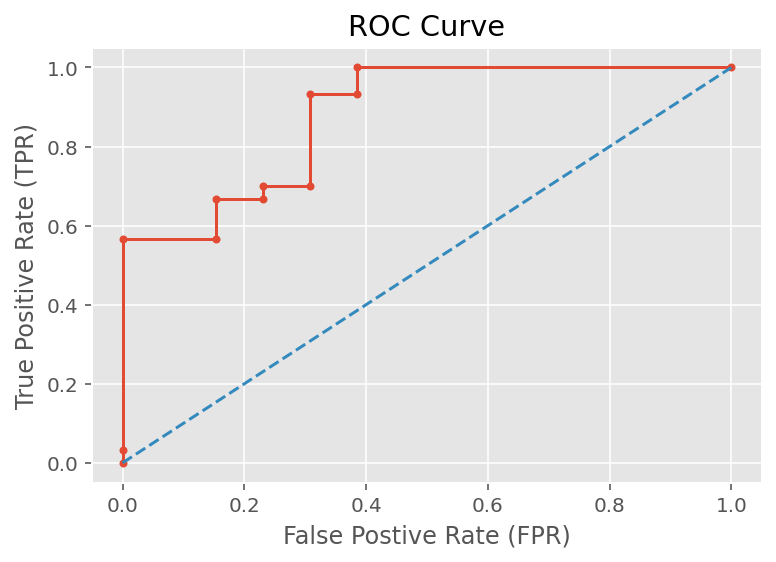

In [53]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
df

import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
    
ax = df.plot.line(x='fpr', y='tpr', title='ROC Curve', legend=False, marker = '.')
plt.plot([0, 1], [0, 1], '--')
ax.set_xlabel("False Postive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
plt.show();

The ROC curve backs up the value of AUC score, as seen in the above graph.

In [54]:
t_pred3 = gs_NB.predict(Data_transformed_test)

In [55]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(t_test, t_pred3))
cm.columns = ['y_pred_No', 'y_pred_Yes']
cm.index = ['y_test_No','y_test_Yes']
print(cm)

            y_pred_No  y_pred_Yes
y_test_No           9           4
y_test_Yes          5          25


From the confusion matrix above, the model has predicted 4 FP values while there are 5 FN values predicted. It has correctly predicted 9 True Negative and 25 True positive values.

In [56]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(t_test,t_pred3))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.86      0.83      0.85        30

    accuracy                           0.79        43
   macro avg       0.75      0.76      0.76        43
weighted avg       0.80      0.79      0.79        43



From the classification report above, the accuracy is 0.79 or 79% while the recall rate for the positive class is calculated to be 0.83 or 83% of the positive class accurately. Hence, the model has a very high predictive performance.

### Support Vector Classifier

As a next step, we go for Support Vector Classifier to check if we can make a further improvement in the accuracy of our predictions. As in every model, we perform Grid Search here as well. We pass the parameters 'C' and 'Kernel' to the parameter grid of our grid search algorithm.

In [57]:
# SVC

from sklearn import svm

params_SVC = {'C': [1,2,3,4,5,6,7,8,9,10], 
          'kernel': ['linear','rbf']}

gs_SVC = GridSearchCV(estimator=svm.SVC(),
                     param_grid=params_SVC, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_SVC.fit(D_train, t_train);


Fitting 15 folds for each of 20 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    4.4s finished


Now let us find out the best parameters.

In [58]:
gs_SVC.best_params_

{'C': 2, 'kernel': 'linear'}

We find that the best model is the Support Vector Model with 'C' equal to 2 and 'Kernel' set to linear. 

Let us have a look at all the accuracy scores of different models iterated by the grid search algorithm.

In [59]:
Mean_Scores_CV_SVC = gs_SVC.cv_results_['mean_test_score']
Mean_Scores_CV_SVC

array([0.86532213, 0.83837535, 0.86733894, 0.8535014 , 0.86336134,
       0.85165266, 0.86532213, 0.85361345, 0.86145658, 0.85170868,
       0.86145658, 0.84980392, 0.86145658, 0.85182073, 0.86145658,
       0.84991597, 0.85753501, 0.84991597, 0.8594958 , 0.84795518])

Let us plot and analyse the performance of the hyper parameters of the Support Vector Classifier.

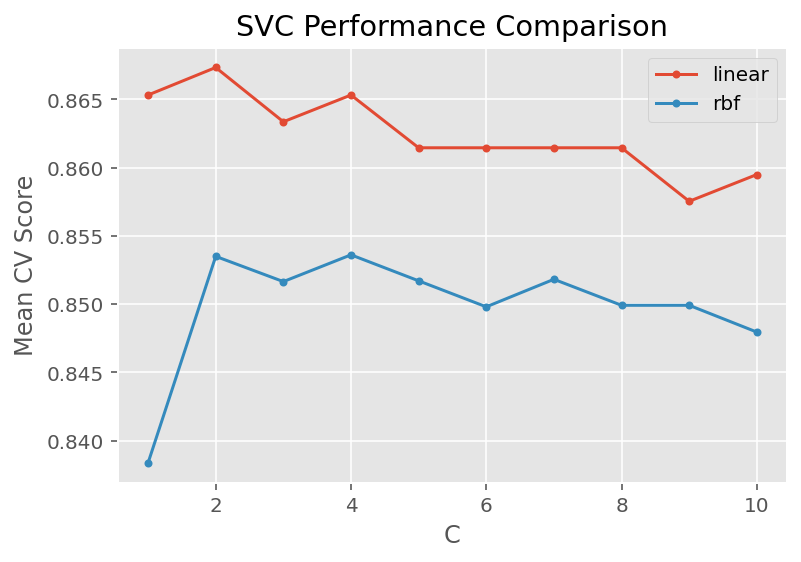

In [60]:
results_SVC = pd.DataFrame(gs_SVC.cv_results_['params'])
results_SVC['test_score'] = gs_SVC.cv_results_['mean_test_score']

for i in ['linear','rbf']:
    temp = results_SVC[results_SVC['kernel'] == i]
    temp_average = temp.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
   
   
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("SVC Performance Comparison")
plt.show()

From the above plot, it is more evident that the SVC model with linear kernel and 'C' value set at 2 performs better than any other SVC model and hence we can go for predictions with this model.

In [61]:
t_pred4 = gs_SVC.predict(D_test)

In [62]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(t_test, t_pred4))
cm.columns = ['y_pred_No', 'y_pred_Yes']
cm.index = ['y_test_No','y_test_Yes']
print(cm)

            y_pred_No  y_pred_Yes
y_test_No           8           5
y_test_Yes          0          30


From above confusion matrix, we could see that model has correctly predicted 8 Negative responses and 30 positive responses. It did not capture any false negative values which is a great result, however it predicted 5 false positive values.

In [63]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(t_test,t_pred4))


              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.92        30

    accuracy                           0.88        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.90      0.88      0.87        43



From the classification report, we could see that the accuracy score is 0.88 which is the best score among all the models that we have fit. It has achieved a recall score of 100% to the positive response variable which is a good sign that model has been fit well.

## Model Comparison  <a name="mc"></a>

Now that we have fit all the models to our dataset, let us have a look at the accuracy score each of the models have obtained. 

In [64]:
from sklearn import metrics

print("Accuracy of K-NN Classifier is: ", metrics.accuracy_score(t_test,t_pred1))
print("Accuracy of Decision Tree Classifier is: ", metrics.accuracy_score(t_test,t_pred2))
print("Accuracy of Naive Bayes Classifier is: ", metrics.accuracy_score(t_test,t_pred3))
print("Accuracy of Support Vector Classifier is: ", metrics.accuracy_score(t_test,t_pred4))

Accuracy of K-NN Classifier is:  0.8604651162790697
Accuracy of Decision Tree Classifier is:  0.8372093023255814
Accuracy of Naive Bayes Classifier is:  0.7906976744186046
Accuracy of Support Vector Classifier is:  0.8837209302325582


As we could see, Support Vector Classifier algorithm with hyperparameters ‘C’ as 2 and ‘Kernel’ as ‘linear’ has achieved the highest accuracy score of 88.37% while 6-KNN classifier algorithm has achieved the second highest accuracy score of 86.04%. 


However, to find if the difference between the accuracy scores of the models are significant, we go for paired t-test. We opt for independent two sample t-test since the arrays of the mean scores are different in size for each model.


In [65]:
from scipy import stats
print(stats.ttest_ind(Mean_Scores_CV_KNN, Mean_Scores_CV_SVC).pvalue)
print(stats.ttest_ind(Mean_Scores_CV_DTree, Mean_Scores_CV_SVC).pvalue)
print(stats.ttest_ind(Mean_Scores_CV_NB, Mean_Scores_CV_SVC).pvalue)


5.263882198472973e-59
9.144555584732876e-65
9.867656438142087e-79


We could see that the p-value is well below than the significance level 0.05 and hence we can conclude that SVC accuracy score is significantly different to that of other scores.

### CRITIQUE AND LIMITATIONS <a name="cl"></a>

Like every other statistical analysis, this project has its own limitations. First of all, the dataset was a little imbalanced with improper proportion of positive and negative response variables, which had an impact on the recall scores of all the models that we fitted. However our aim was to predict whether the students will get placed and hence we can be satisfied with the recall scores of positive target responses (1). 

Secondly, though Grid Search Algorithm gives us the opportunity to perform classification of a model with multiple parameters at a single go, the algorithm is so time consuming. However that has been dealt to some extent, by passing only the important parameters to the parameter grid of the grid search algorithm.

These were the limitations faced in the analysis of placement of students based on the previous academic grades.

### Summary & Conclusions: <a name="sc"></a>

#### Project Summary: <a name="ps"></a>

For the first phase of the project the 'Campus Recruitment, 2020' dataset was prepared by examining the data types of the features and checking for NA values. Further the summary statistics was calculated to check for any impossible values. The outliers were detected using z-score and the observations with a z-score greater than 3 were dropped. 

For the second phase, as it is a classification problem, the following model algorithms were applied:
* K-NN Classifier with Manhattan distance among other parameters. 
* Decision Tree Classifier with split criterion set to entropy.
* Naive Bayes Classifier with variance smoothing value of 0.43. 
* Suport-Vector Classifier with C value of 2 and kernel set to linear. 

Finally, independent paired two samples T-Test was performed to determine the statistical differences between the accuracy scores of the classifiers to decide on which was the best model. 

#### Summary of Findings: <a name="sof"></a>

The business problem for this particualar dataset is to predict if a student would be placed based on the given attributes. Since it was clear that it was a binomial classification problem as the there were only 2 different target labels to classify. 

In Phase 1, initial visual analysis revealed that 68.84% of the students were placed. <br> 
In phase 2, we applied 4 disparate models to the data in the attempt of determining the best predictive model. Feature Selection revealed that Senior Secondary points, Higher Secondary points and points score in Undergraduations were the most influencing features among the top 9.<br>
Further, after model evaluation and comparison, it was clear that the Support Vector Classifier was the optimal model with an accuracy of 88% slightly above K-NN Classifier with 86% accuracy. Naive Bayes Classifier had the least accuracy value of 79%.

#### Conclusion: <a name="con"></a>

The prediction of campus placement was successfully completed by undergoing correct process of Machine Learning. With data cleaning done in phase 1, we fit multiple models to our dataset in phase 2 and finally conclude that Support Vector Classifier performs better in correctly classifying the students who would get placed or not based on their previous academic performances.

## References <a name="ref"></a>

[1] Roshan, B. (2021). Campus Recruitment. Retrieved 5 April 2021, from https://www.kaggle.com/benroshan/factors-affecting-campus-placement